In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib
# Install yellowbrick for visualixation adn feature selection
!pip install yellowbrick

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

### Feature importance : https://www.scikit-yb.org/en/latest/api/model_selection/importances.html

In [6]:
# Set features. This will also be used as your x values.
selected_features = df.drop(columns=["koi_disposition"])

In [7]:
y = df["koi_disposition"]
y.head()

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object

<AxesSubplot:title={'center':'Feature Importances of Top 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

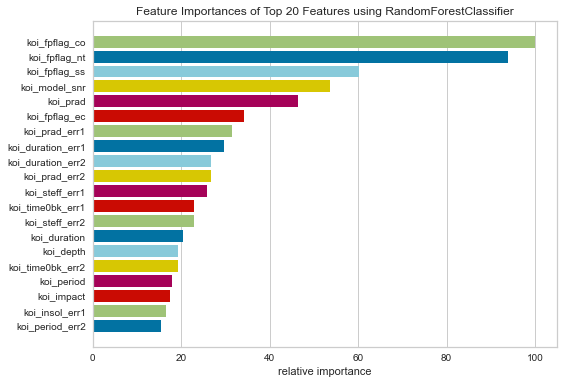

In [8]:
#For feature selection, use RandomForestClassifier with yellowbrick's feature
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)

viz = FeatureImportances(rf, topn=20)
viz.fit(selected_features, y)
viz.show(outpath="Images/RF_FeatureImportances.png")

In [9]:
#Top 20 features of importance
viz.features_

array(['koi_period_err2', 'koi_insol_err1', 'koi_impact', 'koi_period',
       'koi_time0bk_err2', 'koi_depth', 'koi_duration', 'koi_steff_err2',
       'koi_time0bk_err1', 'koi_steff_err1', 'koi_prad_err2',
       'koi_duration_err2', 'koi_duration_err1', 'koi_prad_err1',
       'koi_fpflag_ec', 'koi_prad', 'koi_model_snr', 'koi_fpflag_ss',
       'koi_fpflag_nt', 'koi_fpflag_co'], dtype=object)

In [10]:
#Remove unwanted features. 
X = selected_features[['koi_period_err1', 'koi_impact', 'koi_insol_err1', 'koi_depth',
       'koi_period', 'koi_duration', 'koi_time0bk_err2',
       'koi_time0bk_err1', 'koi_steff_err2', 'koi_prad_err1',
       'koi_duration_err1', 'koi_steff_err1', 'koi_duration_err2',
       'koi_fpflag_ec', 'koi_prad_err2', 'koi_prad', 'koi_model_snr',
       'koi_fpflag_ss', 'koi_fpflag_nt', 'koi_fpflag_co']]


In [11]:
print(X.shape,y.shape)

(6991, 20) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
X_train.head()

,koi_period_err1,koi_impact,koi_insol_err1,koi_depth,koi_period,koi_duration,koi_time0bk_err2,koi_time0bk_err1,koi_steff_err2,koi_prad_err1,koi_duration_err1,koi_steff_err1,koi_duration_err2,koi_fpflag_ec,koi_prad_err2,koi_prad,koi_model_snr,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co
3563,5.470000e-05,1.0170,72.78,102.9,10.548413,1.8720,-0.004110,0.004110,-133,0.65,0.1430,120,-0.1430,0,-0.34,3.89,11.7,0,0,0
4099,1.365000e-04,0.7090,3.92,593.3,24.754385,3.3900,-0.004460,0.004460,-144,0.14,0.1530,144,-0.1530,0,-0.20,2.10,18.0,0,0,0
5460,1.230000e-07,0.2620,184.18,47337.0,1.057336,1.5795,-0.000096,0.000096,-140,1.15,0.0152,126,-0.0152,0,-1.28,14.59,476.0,0,0,0
1091,1.461000e-03,0.0010,0.77,584.8,201.118319,10.3280,-0.005290,0.005290,-112,0.32,0.1650,101,-0.1650,0,-0.20,2.28,34.7,0,0,0
5999,3.181000e-03,0.2136,41.53,193.6,91.649983,10.2940,-0.028600,0.028600,-233,1.27,0.9390,164,-0.9390,0,-0.54,2.27,8.7,0,0,0


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
print(f"X_train Shape {X_train_scaled.shape}, y_train Shape {y_train.shape} \n X_test Shape {X_test_scaled.shape}, y_test Shape {y_test.shape}")

X_train Shape (5243, 20), y_train Shape (5243,) 
 X_test Shape (1748, 20), y_test Shape (1748,)


# Train the Model



#### Logistic Regression

In [16]:
# My first prefence for categorical supervized model is logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [17]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.841502956322716
Testing Data Score: 0.8615560640732265


In [18]:
predictions_logistic = classifier.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions_logistic[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'CONFIRMED' 'FALSE POSITIVE']
First 10 Actual labels: ['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']


#### RandomForest Classifier

In [19]:
#create another model to train the data
rf1 = RandomForestClassifier(n_estimators=200)
rf1 = rf1.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf1.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9090389016018307


#### Classification Report Visualizaton: https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

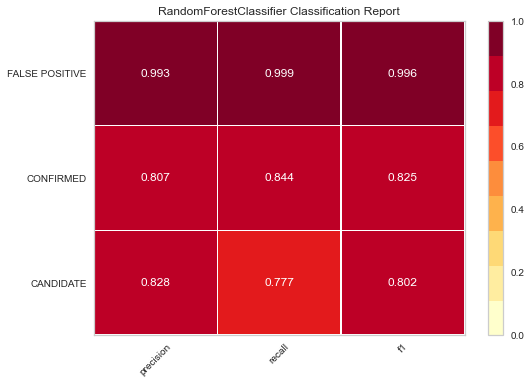

In [20]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf1)

visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show(outpath="Images/RF_ClassificationReport.png")  # Finalize and show the figure

In [21]:
#Show Actual and Predicted
predict = rf1.predict(X_test_scaled)
pd.DataFrame({"Actual":y_test[:10],
              "Predicted":predict[:10]})

,Actual,Predicted
1213,CONFIRMED,CONFIRMED
5220,FALSE POSITIVE,FALSE POSITIVE
6688,FALSE POSITIVE,FALSE POSITIVE
2031,CONFIRMED,CONFIRMED
5824,FALSE POSITIVE,FALSE POSITIVE
2053,FALSE POSITIVE,FALSE POSITIVE
2567,FALSE POSITIVE,FALSE POSITIVE
1687,CONFIRMED,CONFIRMED
1837,CANDIDATE,CONFIRMED
4016,FALSE POSITIVE,FALSE POSITIVE


#### Note: RandomForestClassifier model seems to be overfitted(test score higher than actual)

#### KNN - K Nearest Neighbour

k: 1, Train/Test Score: 1.000/0.851
k: 3, Train/Test Score: 0.920/0.882
k: 5, Train/Test Score: 0.905/0.891
k: 7, Train/Test Score: 0.896/0.888
k: 9, Train/Test Score: 0.894/0.897
k: 11, Train/Test Score: 0.893/0.888
k: 13, Train/Test Score: 0.890/0.893
k: 15, Train/Test Score: 0.890/0.890
k: 17, Train/Test Score: 0.889/0.888
k: 19, Train/Test Score: 0.888/0.889


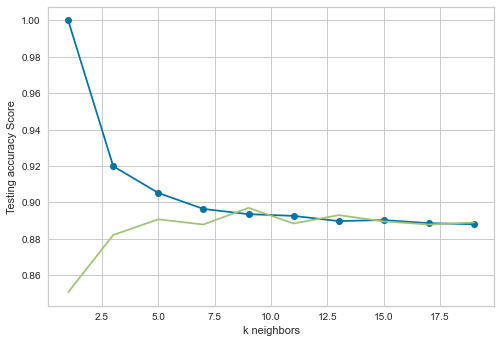

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.888


<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

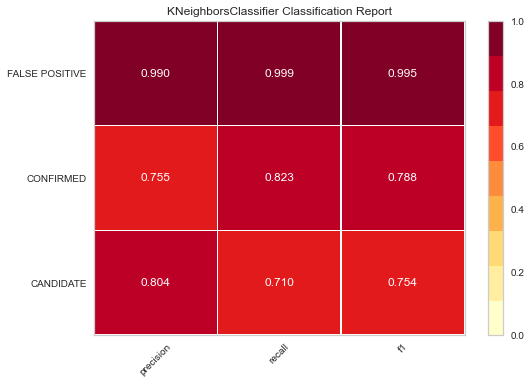

In [24]:
visualizer = ClassificationReport(knn)

visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show(outpath="Images/KNN_ClassificationReport.png")

#### Decision Tree

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
print("Decision tree Score: ", round(clf.score(X_test_scaled, y_test),3))

Decision tree Score:  0.858


<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

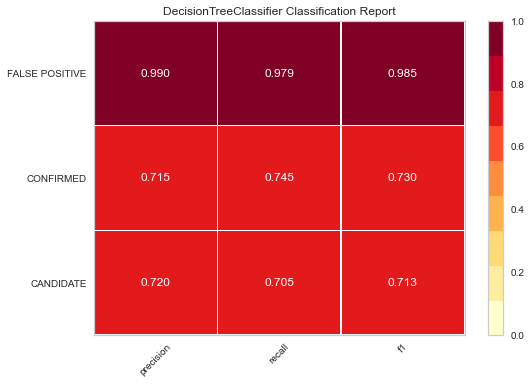

In [26]:
visualizer = ClassificationReport(clf)

visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show(outpath="Images/DT_ClassificationReport.png")  

#### SVM-Support vector machine

In [27]:
# Create the SVC Model
from sklearn.svm import SVC 
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [28]:
# Model Accuracy
print('SVM Test Acc: %.3f' % svc_model.score(X_test_scaled, y_test))

SVM Test Acc: 0.858


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [29]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc_model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.840 total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.847 total time=   0.1s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.819 total time=   0.1s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.824 total time=   0.1s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.827 total time=   0.1s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.840 total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.847 total time=   0.2s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.819 total time=   0.1s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.824 total time=   0.1s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.827 total time=   0.1s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.840 total time=   0.2s
[CV 2/5] END ..................C=1, gamma=0.001;

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
y_test.unique()

In [ ]:
target_names = y_test.unique()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

#### Confusion Matrix

In [ ]:
#Plot confusion matrix for SVG model
from yellowbrick.classifier import ConfusionMatrix
viz = ConfusionMatrix(grid, classes=target_names)

viz.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
viz.score(X_test_scaled, y_test) 
viz.show(outpath="Images/SVC_ConfusionMatrix.png")

#### Conclusion

With SVM with grid selection score of 87% , Decision Tree score of 86% , KNN score of 88% ,aand Logistic Regression of 86%, 
Random Forest scored 90% test prediction accuracy.  Random forest data could be overfitted as training accuracy was more than the test accuracy. I would prefer SVM with grid selection as our training model.

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Divya_Shetty.sav'
joblib.dump(grid, filename)